In [1]:
from lighter.utils.runner import parse_config
from lighter.utils.dynamic_imports import import_module_from_path

import os
from monai.visualize import blend_images
import matplotlib.pyplot as plt
import numpy as np
import torch
from utils import plot_3d_image


# Change directory to the experiment folder
os.chdir("/home/suraj/Repositories/lighter-ct-fm")

In [7]:
os.getcwd()

'/home/suraj/Repositories/lighter-ct-fm'

In [2]:
kwargs = {
    "config": ["./evaluation/radchest.yaml", "./evaluation/baselines/segresencoder_random.yaml"],
    "vars#name": 'baseline',
    "vars#project": 'test',
    "vars#wandb_group": ""
}
# Parse and validate the config.
parser = parse_config(**kwargs)

# Import the project folder as a module, if specified.
project = parser.get_parsed_content("project")
if project is not None:
    import_module_from_path("project", project)


2024/09/30 15:47:36.888  |  ℹ️  INFO      |  /home/suraj/Repositories/lighter-ct-fm imported   ]8;id=519095;file:///home/suraj/Repositories/lighter/lighter/utils/dynamic_imports.py\dynamic_imports.py]8;;\:]8;id=228085;file:///home/suraj/Repositories/lighter/lighter/utils/dynamic_imports.py#79\79]8;;\
as 'project' module.                                                                                               

In [3]:

def dataset_item_generator(item):
    if isinstance(item, list) or isinstance(item, tuple):
        for sub_item in item:
            if sub_item is None:
                continue
            elif isinstance(sub_item, list) or isinstance(sub_item, tuple):
                yield from dataset_item_generator(sub_item)
            else:
                yield sub_item
    elif isinstance(item, dict):
        for key, value in item.items():
            if value is None:
                continue
            elif isinstance(value, list) or isinstance(value, tuple):
                yield from dataset_item_generator(value)
            else:
                yield value
    else:
        yield item

        


In [4]:
train_dataset = parser.get_parsed_content("system#datasets#train")


2024/09/30 15:47:43.319  |  ⚠️  WARNING   |  monai.transforms.croppad.dictionary               ]8;id=988111;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/utils/deprecate_utils.py\deprecate_utils.py]8;;\:]8;id=178415;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/utils/deprecate_utils.py#38\38]8;;\
CropForegroundd.__init__:allow_smaller: Current default value of argument                                          
`allow_smaller=True` has been deprecated since version 1.2. It will be changed to                                  
`allow_smaller=False` in version 1.5.                                                                              

2024/09/30 15:47:43.323  |  ⚠️  WARNING   |  cache_grid=True is not compatible with the dynamic        ]8;id=771504;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/transforms/spatial/array.py\array.py]8;;\:]8;id=506836;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/transforms/spatial/array.py#2426\2426]8;;\
spatial_size, please specify 'spatial_size'.                                                                       

In [5]:
val_dataset = parser.get_parsed_content("system#datasets#val")
predict_dataset = parser.get_parsed_content("system#datasets#predict")

2024/09/30 15:47:44.939  |  ⚠️  WARNING   |  monai.transforms.croppad.dictionary               ]8;id=293399;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/utils/deprecate_utils.py\deprecate_utils.py]8;;\:]8;id=664460;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/utils/deprecate_utils.py#38\38]8;;\
CropForegroundd.__init__:allow_smaller: Current default value of argument                                          
`allow_smaller=True` has been deprecated since version 1.2. It will be changed to                                  
`allow_smaller=False` in version 1.5.                                                                              

2024/09/30 15:47:45.192  |  ⚠️  WARNING   |  monai.transforms.croppad.dictionary               ]8;id=710716;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/utils/deprecate_utils.py\deprecate_utils.py]8;;\:]8;id=987445;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/utils/deprecate_utils.py#38\38]8;;\
CropForegroundd.__init__:allow_smaller: Current default value of argument                                          
`allow_smaller=True` has been deprecated since version 1.2. It will be changed to                                  
`allow_smaller=False` in version 1.5.                                                                              

In [6]:
len(train_dataset), len(val_dataset), len(predict_dataset)

(2286, 984, 360)

2024/09/30 15:47:47.601  |  ⚠️  WARNING   |  To copy construct from a tensor, it is recommended to  ]8;id=232933;file:///tmp/ipykernel_1070933/4041503425.py\4041503425.py]8;;\:]8;id=28850;file:///tmp/ipykernel_1070933/4041503425.py#22\22]8;;\
use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather                    
than torch.tensor(sourceTensor).                                                                                   

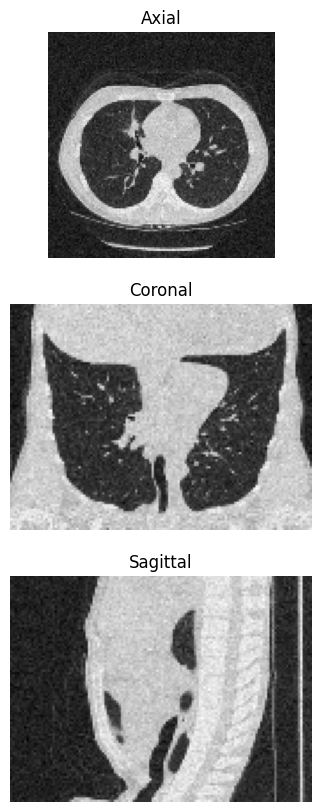

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:25                                                                                                  │
│                                                                                                                 │
│   22 │   │   │   item = torch.tensor(item)                                                                      │
│   23 │   │   │   plot_3d_image(item)                                                                            │
│   24 │   │   else:                                                                                              │
│ ❱ 25 │   │   │   plt.imshow(item[0])                                                                            │
│   26 │   │   │   plt.show()                                                                                     │
│   27                                                                                                            │
│   28                                                                                                            │
│                                                                                                                 │
│ /home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/matplotlib/pyplot.py:3562 in imshow        │
│                                                                                                                 │
│   3559 │   data=None,                                                                                           │
│   3560 │   **kwargs,                                                                                            │
│   3561 ) -> AxesImage:                                                                                          │
│ ❱ 3562 │   __ret = gca().imshow(                                                                                │
│   3563 │   │   X,                                                                                               │
│   3564 │   │   cmap=cmap,                                                                                       │
│   3565 │   │   norm=norm,                                                                                       │
│                                                                                                                 │
│ /home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/matplotlib/__init__.py:1473 in inner       │
│                                                                                                                 │
│   1470 │   @functools.wraps(func)                                                                               │
│   1471 │   def inner(ax, *args, data=None, **kwargs):                                                           │
│   1472 │   │   if data is None:                                                                                 │
│ ❱ 1473 │   │   │   return func(                                                                                 │
│   1474 │   │   │   │   ax,                                                                                      │
│   1475 │   │   │   │   *map(sanitize_sequence, args),                                                           │
│   1476 │   │   │   │   **{k: sanitize_sequence(v) for k, v in kwargs.items()})                                  │
│                                                                                                                 │
│ /home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5895 in imshow    │
│                                                                                                                 │
│   5892 │   │   if aspect is not None:                                                                           │
│   5893 │   │   │   self.set_aspect(aspect)            

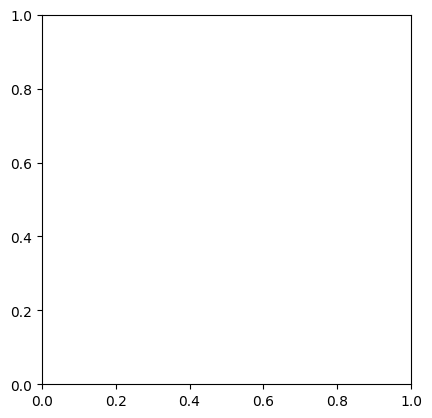

In [7]:
dataset_idx = 3
dataset_item = train_dataset[dataset_idx]

# Recursively get the first valid item
g = dataset_item_generator(dataset_item)            

for item in g:
    if isinstance(item, dict):
        for k, v in item.items():
            if isinstance(v, torch.Tensor):
                print(k, v.shape)
                if len(v.shape) == 4:
                    plot_3d_image(v)
                else:
                    plt.imshow(v[0])
                    plt.show()
            else:
                print(v)
    elif isinstance(item, torch.Tensor) or isinstance(item, np.ndarray):
        if len(item.shape) == 4:
            # item = item.transpose(0, 3, 2, 1)
            item = torch.tensor(item)
            plot_3d_image(item)
        else:
            plt.imshow(item[0])
            plt.show()
        

Image and label shape mismatch: torch.Size([1, 96, 128, 128]) torch.Size([9]). Setting label shape to image shape.
(tensor([0], dtype=torch.int32), tensor([1572864]))
Image shape: torch.Size([1, 96, 128, 128])
Label shape: torch.Size([1, 96, 128, 128])


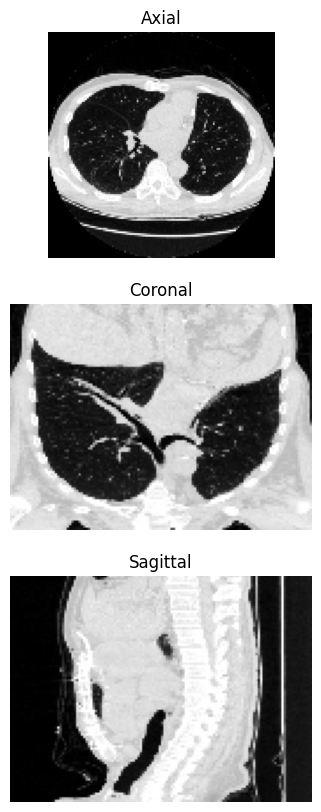

In [22]:

dataset_idx = 9

item = val_dataset[dataset_idx]
image, label = item["input"], item["target"]

if image.shape != label.shape:
    print(f"Image and label shape mismatch: {image.shape} {label.shape}. Setting label shape to image shape.")
    label = torch.zeros_like(image)
label = label.to(dtype=torch.int)

print(label.unique(return_counts=True))
print(f"Image shape: {image.shape}")
print(f"Label shape: {label.shape}")

ret = blend_images(image=image, label=label, alpha=0.0, cmap="hsv")
plot_3d_image(ret)

In [10]:
import SimpleITK as sitk

label = sitk.ReadImage("/mnt/data1/TotalSegmentator/v2/processed/s1268/label.nii.gz")

label = sitk.GetArrayFromImage(label)

In [11]:
set(np.unique(label).tolist()).intersection(set([6, 5, 4, 3, 2, 1, 22, 32, 31, 30, 29, 28, 27, 26, 25, 21, 20, 19, 18, 7]))

set()

In [12]:
dataset[idx]

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 dataset[idx]                                                                                                │
│   2                                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'dataset' is not defined

In [9]:
item["id"]

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 item["id"]                                                                                                  │
│   2                                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'item' is not defined

In [34]:
from tqdm import tqdm
dataset = parser.get_parsed_content("system#datasets#train")
exclude_list = []
for i in tqdm(range(0, len(dataset))):
    try:
        out = dataset[i]
    except:
        exclude_list.append(i)

 69%|██████▉   | 240/347 [00:55<00:22,  4.69it/s]

2024/08/08 17:09:44.034  |  ⚠️  WARNING   |  invalid value encountered in divide                        ]8;id=568797;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/transforms/utils.py\utils.py]8;;\:]8;id=503038;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/transforms/utils.py#673\673]8;;\

100%|██████████| 347/347 [03:10<00:00,  1.82it/s]


In [35]:
exclude_list

[240, 244, 254, 256]

In [46]:
for exclude_idx in exclude_list:
    print(dataset.data[exclude_idx])

{'image': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1275/ct.nii.gz'), 'label': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1275/label.nii.gz'), 'id': 's1275'}
{'image': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1341/ct.nii.gz'), 'label': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1341/label.nii.gz'), 'id': 's1341'}
{'image': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1268/ct.nii.gz'), 'label': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1268/label.nii.gz'), 'id': 's1268'}
{'image': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1261/ct.nii.gz'), 'label': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1261/label.nii.gz'), 'id': 's1261'}


In [49]:
import pandas as pd
x = pd.read_csv("/mnt/data1/TotalSegmentator/v2/processed/meta.csv")

In [50]:
x[~x['image_id'].isin(['s1275', 's1341', 's1268', 's1261'])]

,image_id,age,gender,institute,study_type,split,manufacturer,scanner_model,kvp,pathology,pathology_location,vista_split
0,s1366,50.0,NaN,I,ct polytrauma,train,siemens,sensation 64,120.0,unclear,unclear,train
1,s0245,77.0,m,I,ct abdomen-pelvis,train,siemens,somatom definition flash,100.0,no_pathology,no_location,train
2,s0325,65.0,f,I,ct abdomen-pelvis,train,siemens,sensation 64,120.0,other,abdomen,train
3,s0320,80.0,m,I,ct angiography abdomen-pelvis-leg,train,siemens,sensation 64,120.0,vascular,abdomen,val
4,s0193,63.0,m,C,ct abdomen-pelvis,train,siemens,emotion 16,130.0,no_pathology,no_location,test
...,...,...,...,...,...,...,...,...,...,...,...,...
1223,s1425,NaN,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,NaN,train
1224,s1426,68.0,m,NaN,NaN,test,ge,lightspeed pro 16,120.0,NaN,NaN,train
1225,s1427,23.0,m,NaN,NaN,test,ge,lightspeed16,120.0,NaN,NaN,train
1226,s1428,66.0,m,NaN,NaN,test,ge,discovery mi,120.0,NaN,NaN,train


In [43]:
df

,image_id,age,gender,institute,study_type,split,manufacturer,scanner_model,kvp,pathology,pathology_location,vista_split
0,s1366,50.0,NaN,I,ct polytrauma,train,siemens,sensation 64,120.0,unclear,unclear,train
1,s0245,77.0,m,I,ct abdomen-pelvis,train,siemens,somatom definition flash,100.0,no_pathology,no_location,train
2,s0325,65.0,f,I,ct abdomen-pelvis,train,siemens,sensation 64,120.0,other,abdomen,train
3,s0320,80.0,m,I,ct angiography abdomen-pelvis-leg,train,siemens,sensation 64,120.0,vascular,abdomen,val
4,s0193,63.0,m,C,ct abdomen-pelvis,train,siemens,emotion 16,130.0,no_pathology,no_location,test
...,...,...,...,...,...,...,...,...,...,...,...,...
1223,s1425,NaN,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,NaN,train
1224,s1426,68.0,m,NaN,NaN,test,ge,lightspeed pro 16,120.0,NaN,NaN,train
1225,s1427,23.0,m,NaN,NaN,test,ge,lightspeed16,120.0,NaN,NaN,train
1226,s1428,66.0,m,NaN,NaN,test,ge,discovery mi,120.0,NaN,NaN,train
